## [sklearn.manifold.TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

> t-distributed Stochastic Neighbor Embedding.

t-SNE [1] is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high. This will suppress some noise and speed up the computation of pairwise distances between samples. For more tips see Laurens van der Maaten’s FAQ [2].

---

parameters

---

- n_components : int, optional (default: 2)

> Dimension of the embedded space.


- init : string or numpy array, optional (default: “random”)

> Initialization of embedding. Possible options are ‘random’, ‘pca’, and a numpy array of shape (n_samples, n_components). PCA initialization cannot be used with precomputed distances and is usually more globally stable than random initialization.


- learning_rate : float, optional (default: 200.0)

> The learning rate for t-SNE is usually in the range [10.0, 1000.0]. If the learning rate is too high, the data may look like a ‘ball’ with any point approximately equidistant from its nearest neighbours. If the learning rate is too low, most points may look compressed in a dense cloud with few outliers. If the cost function gets stuck in a bad local minimum increasing the learning rate may help.


- early_exaggeration : float, optional (default: 12.0)

> Controls how tight natural clusters in the original space are in the embedded space and how much space will be between them. For larger values, the space between natural clusters will be larger in the embedded space. Again, the choice of this parameter is not very critical. If the cost function increases during initial optimization, the early exaggeration factor or the learning rate might be too high.


- perplexity : float, optional (default: 30)

> The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. Different values can result in significanlty different results.

## t-SNE 範例

(Optional) 若尚未安裝相關套件，執行下一行，然後 restart kernel

In [ ]:
# !pip3 install --user sklearn
# !pip3 install --user --upgrade matplotlib

載入套件

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold, datasets

%matplotlib inline

載入 digits (4個數字) 資料集

In [2]:
digits = datasets.load_digits(n_class=4)
X = digits.data
y = digits.target

設定 模型 估計參數

In [4]:
n_samples, n_features = X.shape
n_neighbors = 30
tsne = manifold.TSNE(n_components=2, random_state=0, init='pca', learning_rate=200., early_exaggeration=12.)

資料建模 並 視覺化 結果

Computing t-SNE embedding


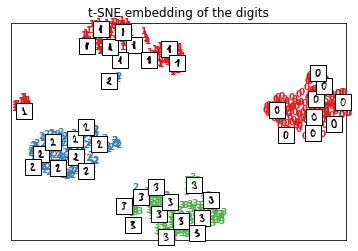

In [5]:
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")

X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits")

plt.show()

## 作業

用 digits (dataset.load_digits()) 資料嘗試跑 t-SNE

In [6]:
from sklearn import datasets

# 載入 digits 資料集
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [7]:
# 設定 模型 估計參數
n_samples, n_features = X.shape
n_neighbors = 30
tsne = manifold.TSNE(n_components=2, random_state=0, init='pca', learning_rate=200., early_exaggeration=12.)

Computing t-SNE embedding


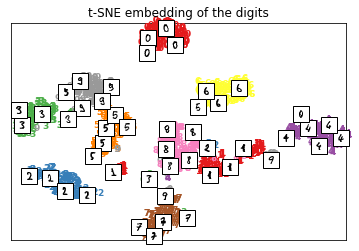

In [8]:
# 資料建模 並 視覺化 結果
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")

X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits")

plt.show()

## 參考資料


## [1. Visualizing Data using t-SNE 影片來源：GoogleTechTalks YT](https://www.youtube.com/watch?v=RJVL80Gg3lA)


## [2. Unsupervised Learning 影片來源：李弘毅 YT](https://www.youtube.com/watch?v=GBUEjkpoxXc)